In [1]:
import torch
import numpy as np 
import matplotlib.pyplot as plt

patient num 1 variable number:  0


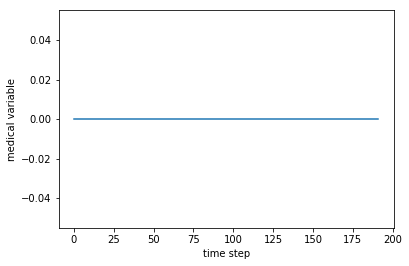

patient num 1 variable number:  1


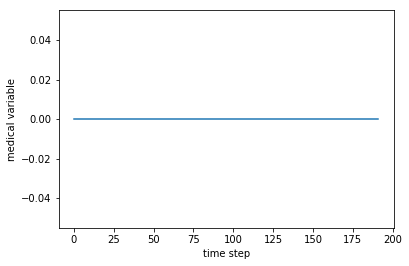

patient num 1 variable number:  2


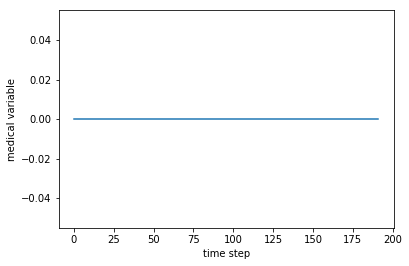

patient num 1 variable number:  3


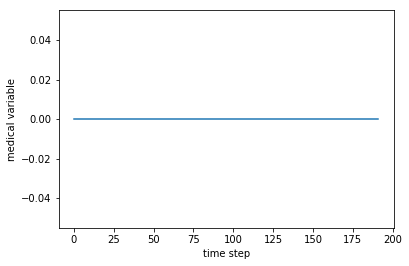

patient num 1 variable number:  4


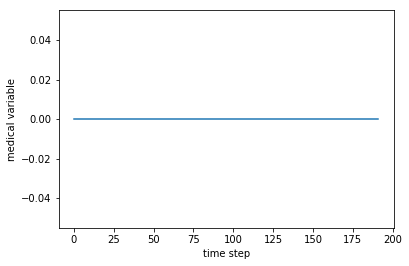

patient num 1 variable number:  5


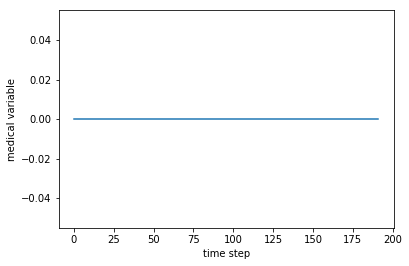

patient num 1 variable number:  6


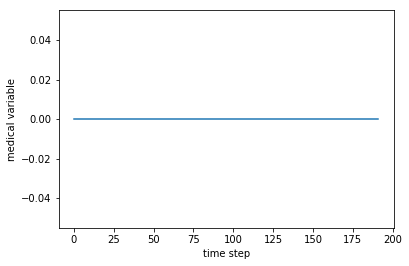

patient num 1 variable number:  7


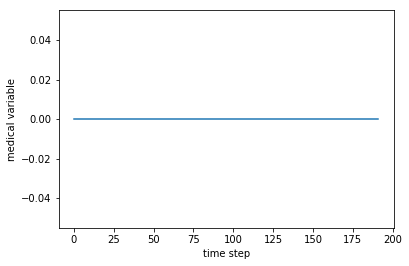

patient num 1 variable number:  8


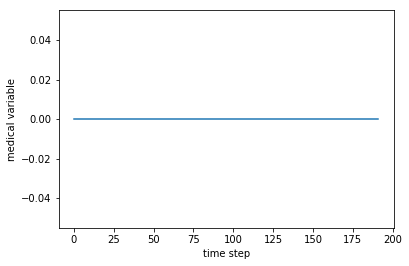

patient num 1 variable number:  9


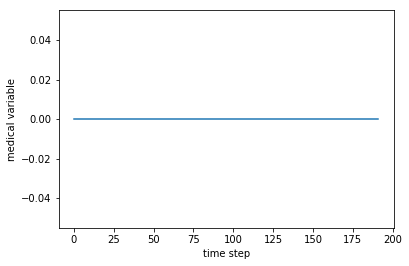

patient num 1 variable number:  10


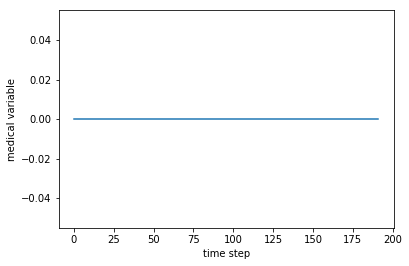

patient num 1 variable number:  11


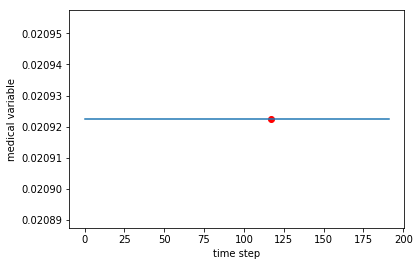

patient num 1 variable number:  12


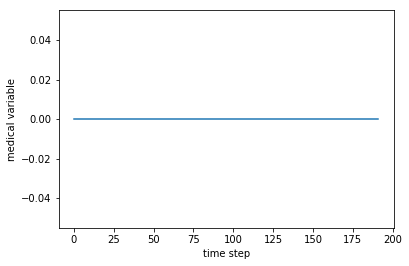

patient num 1 variable number:  13


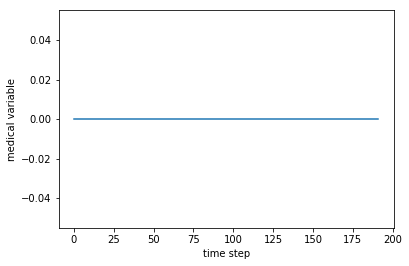

patient num 1 variable number:  14


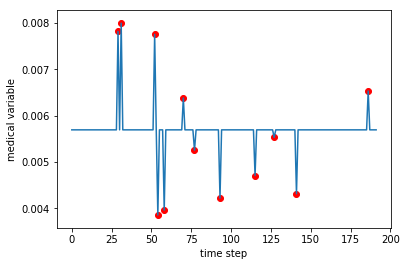

patient num 1 variable number:  15


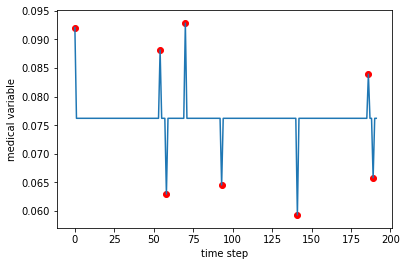

patient num 1 variable number:  16


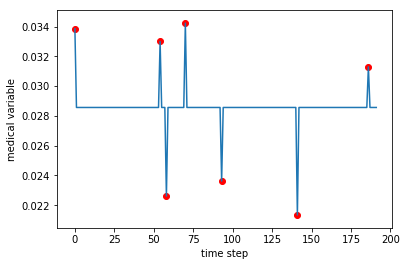

patient num 1 variable number:  17


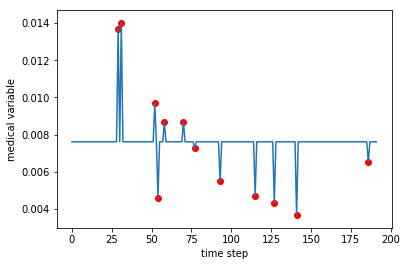

patient num 1 variable number:  18
outlier tick
outlier index in realObservations array:  6


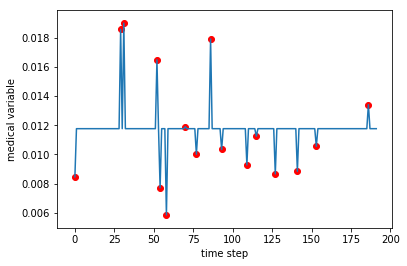

patient num 1 variable number:  19


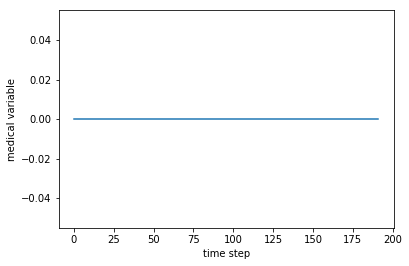

patient num 1 variable number:  20


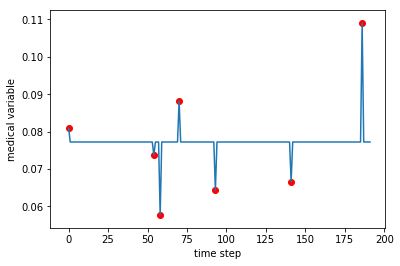

patient num 1 variable number:  21


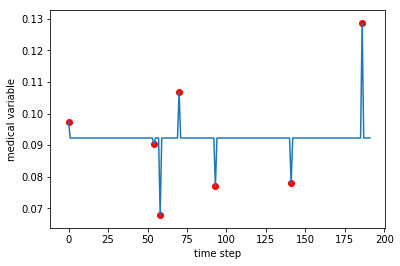

patient num 1 variable number:  22


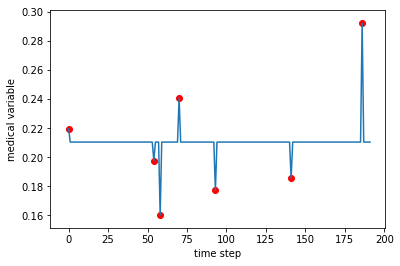

patient num 1 variable number:  23
outlier tick
outlier index in realObservations array:  3


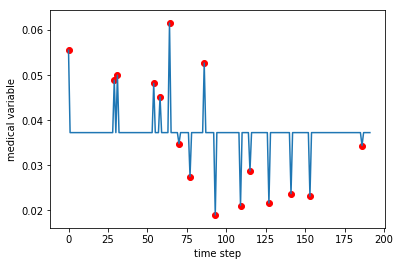

patient num 1 variable number:  24
outlier tick
outlier index in realObservations array:  9


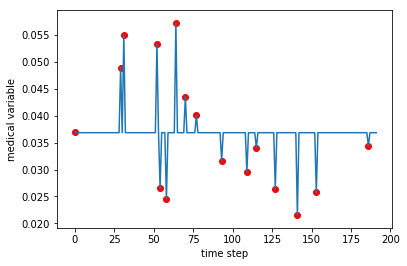

patient num 1 variable number:  25


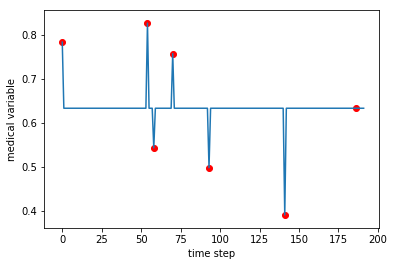

patient num 1 variable number:  26


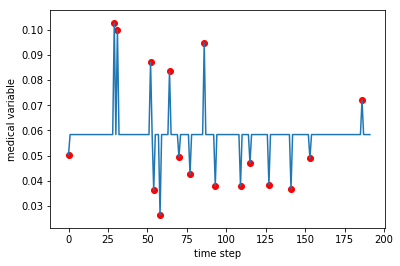

patient num 1 variable number:  27


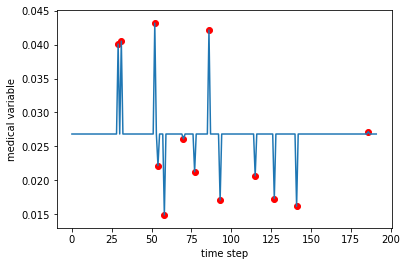

patient num 1 variable number:  28


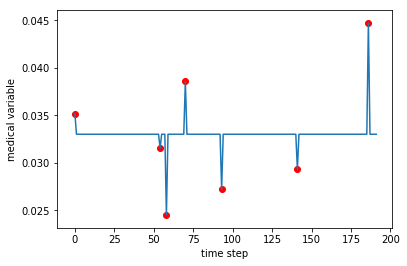

patient num 1 variable number:  29
outlier tick
outlier index in realObservations array:  9


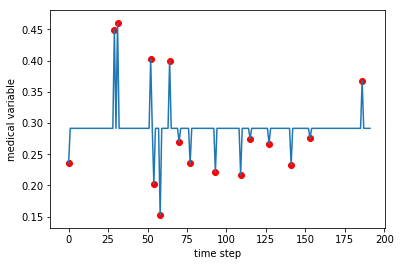

patient num 1 variable number:  30


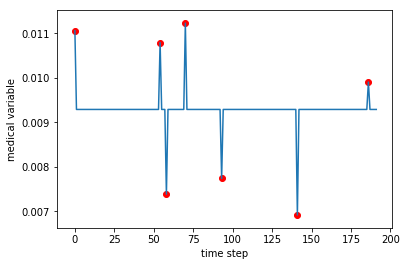

patient num 1 variable number:  31


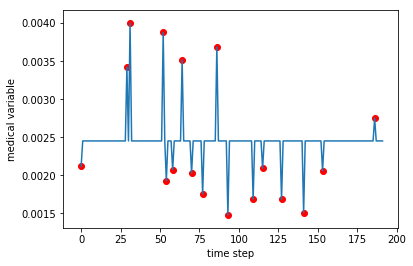

patient num 1 variable number:  32


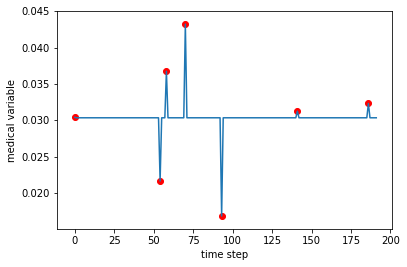

patient num 1 variable number:  33
outlier tick
outlier index in realObservations array:  16


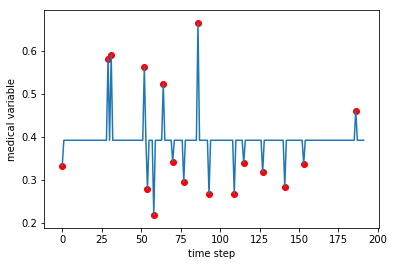

patient num 1 variable number:  34


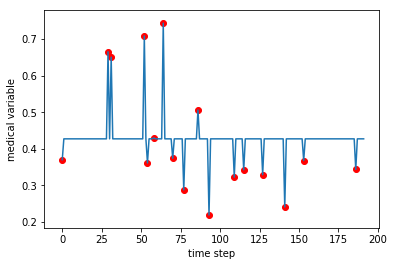

patient num 1 variable number:  35
outlier tick
outlier index in realObservations array:  21
outlier tick
outlier index in realObservations array:  22
outlier tick
outlier index in realObservations array:  23
outlier tick
outlier index in realObservations array:  24


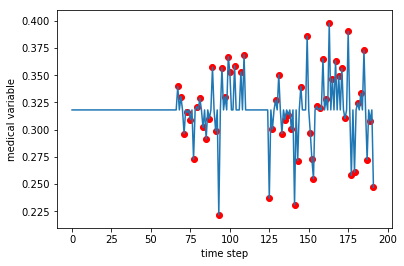

patient num 1 variable number:  36
outlier tick
outlier index in realObservations array:  21
outlier tick
outlier index in realObservations array:  22
outlier tick
outlier index in realObservations array:  23


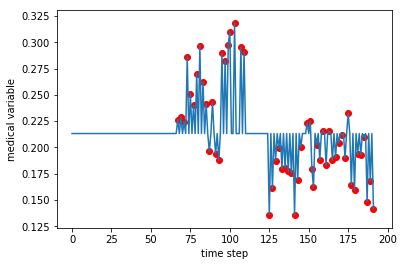

patient num 1 variable number:  37


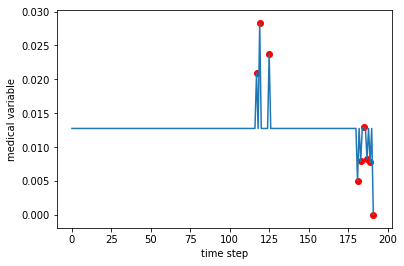

patient num 1 variable number:  38


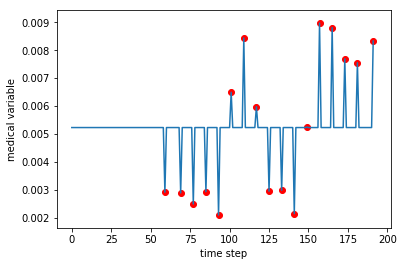

patient num 1 variable number:  39
outlier tick
outlier index in realObservations array:  2


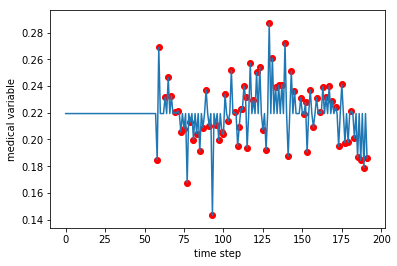

patient num 1 variable number:  40


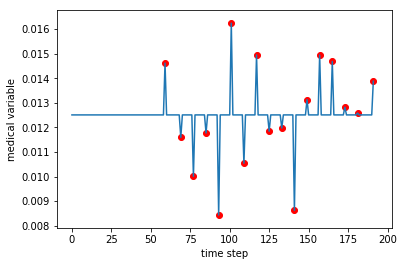

patient num 1 variable number:  41
outlier tick
outlier index in realObservations array:  2


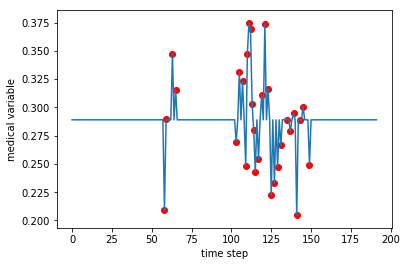

patient num 1 variable number:  42
outlier tick
outlier index in realObservations array:  2


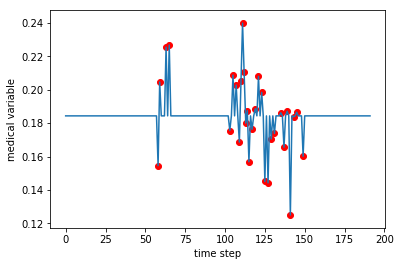

patient num 1 variable number:  43
outlier tick
outlier index in realObservations array:  31
outlier tick
outlier index in realObservations array:  52


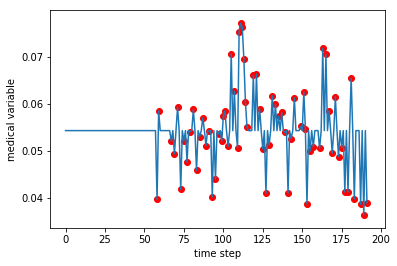

patient num 1 variable number:  44
outlier tick
outlier index in realObservations array:  23


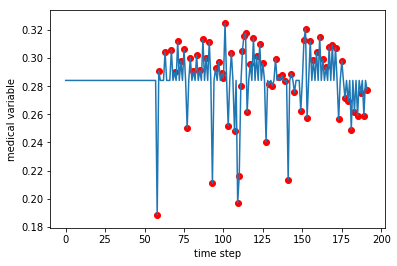

patient num 1 variable number:  45
outlier tick
outlier index in realObservations array:  4


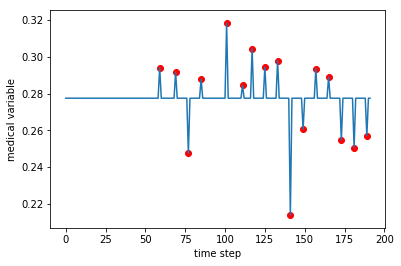

patient num 1 variable number:  46
outlier tick
outlier index in realObservations array:  6


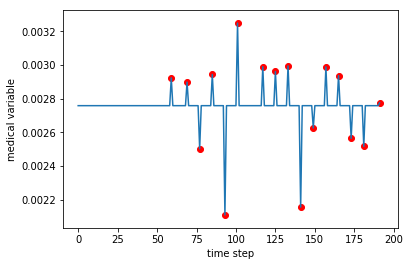

patient num 1 variable number:  47


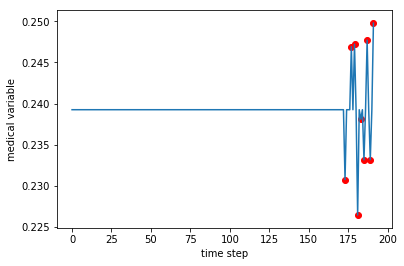

patient num 1 variable number:  48
outlier tick
outlier index in realObservations array:  0
outlier tick
outlier index in realObservations array:  17
outlier tick
outlier index in realObservations array:  26
outlier tick
outlier index in realObservations array:  45


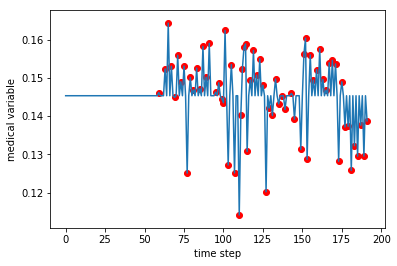

patient num 1 variable number:  49
outlier tick
outlier index in realObservations array:  0
outlier tick
outlier index in realObservations array:  17
outlier tick
outlier index in realObservations array:  26
outlier tick
outlier index in realObservations array:  45


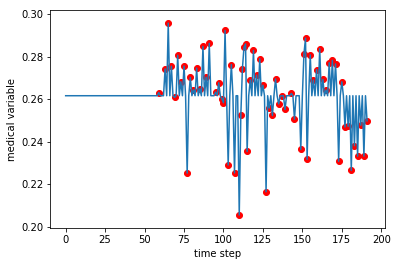

patient num 1 variable number:  50
outlier tick
outlier index in realObservations array:  0
outlier tick
outlier index in realObservations array:  17
outlier tick
outlier index in realObservations array:  26
outlier tick
outlier index in realObservations array:  45


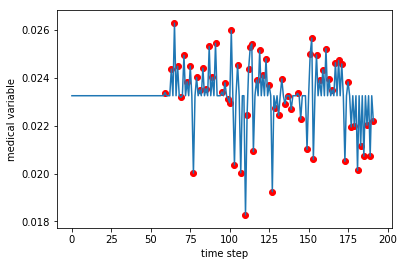

patient num 1 variable number:  51
outlier tick
outlier index in realObservations array:  0
outlier tick
outlier index in realObservations array:  17
outlier tick
outlier index in realObservations array:  26
outlier tick
outlier index in realObservations array:  45


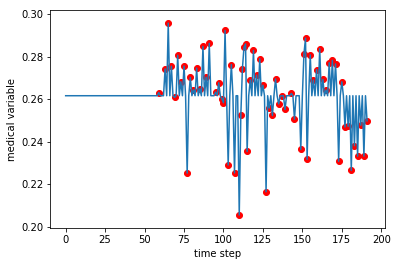

patient num 1 variable number:  52
outlier tick
outlier index in realObservations array:  18
outlier tick
outlier index in realObservations array:  21
outlier tick
outlier index in realObservations array:  22
outlier tick
outlier index in realObservations array:  23
outlier tick
outlier index in realObservations array:  24


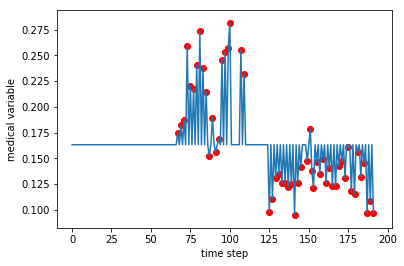

patient num 1 variable number:  53
outlier tick
outlier index in realObservations array:  2


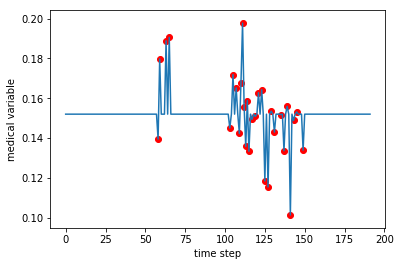

patient num 1 variable number:  54


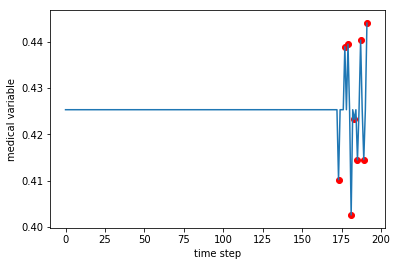

patient num 1 variable number:  55
outlier tick
outlier index in realObservations array:  0
outlier tick
outlier index in realObservations array:  17
outlier tick
outlier index in realObservations array:  26
outlier tick
outlier index in realObservations array:  45


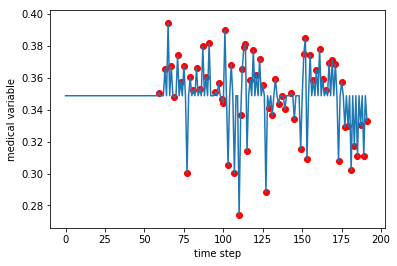

patient num 1 variable number:  56
outlier tick
outlier index in realObservations array:  0
outlier tick
outlier index in realObservations array:  17
outlier tick
outlier index in realObservations array:  26
outlier tick
outlier index in realObservations array:  45


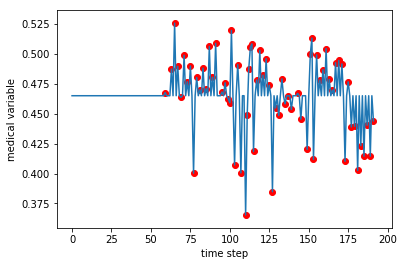

patient num 1 variable number:  57
outlier tick
outlier index in realObservations array:  0
outlier tick
outlier index in realObservations array:  17
outlier tick
outlier index in realObservations array:  26
outlier tick
outlier index in realObservations array:  45


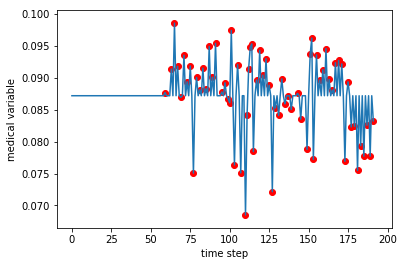

patient num 1 variable number:  58
outlier tick
outlier index in realObservations array:  0
outlier tick
outlier index in realObservations array:  17
outlier tick
outlier index in realObservations array:  26
outlier tick
outlier index in realObservations array:  45


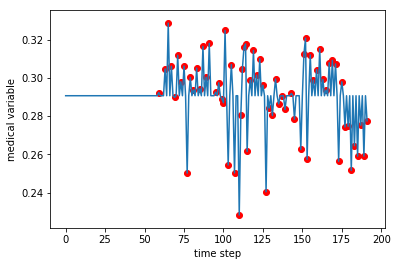

In [18]:
allTimeSeries=torch.load("data/192T/time_series.pt")
allMasks=torch.load("data/192T/masks.pt")
allLabels=torch.load("data/192T/labels.pt")

timeStepVector = [s for s in range(192)]

#IMPUTATION WITH MEAN OF ENTIRE TIME SEREIS

for i in range(1, 2):                         #6261 is num of patients
    timeSeriesOnePatient = allTimeSeries[i]   #selected first patient in dataset
    masksOnePatient = allMasks[i]
    
    
    for j in range(59):                       #59 is num of variables
        oneTimeSeries = np.asarray(timeSeriesOnePatient[..., j])
        oneMask = np.asarray(masksOnePatient[..., j])
        print('patient num', i, 'variable number: ', j)
        realObservations = []                #vector with observed data values that are not outliers
        indexesOfRealObservations = []
        
        #fill up yVector with observed data values
        for k in range(192):
            if (oneMask[k]==0.0):              #if datapoint is NOT originally missing
                indexesOfRealObservations.append(k)
                realObservations.append(oneTimeSeries[k])
                
        #calculating mean, standard deviation, bounds for outliers
        mean = np.mean(realObservations)
        sd = np.std(realObservations)
        upperBound = mean + 2*sd
        lowerBound = mean - 2*sd
        
        #finding outliers    
        indexesOfNoOutliersRealObservations = []
        noOutliersRealObservations = []
        for t in range(len(realObservations)):
            indexesOfNoOutliersRealObservations.append(indexesOfRealObservations[t])
            noOutliersRealObservations.append(realObservations[t])
        for m in range(len(realObservations)):
            if (realObservations[m] > upperBound or realObservations[m] < lowerBound):
                print('outlier tick')
                print('outlier index in realObservations array: ', m)
                indexesOfNoOutliersRealObservations.remove(indexesOfRealObservations[m])
                noOutliersRealObservations.remove(realObservations[m])
            else:    #if this real observation is not an outlier
                pass
        
        #imputing outliers and missing values with NEW mean
        if len(indexesOfRealObservations)==0:
            pass
        else:
            mean = np.mean(noOutliersRealObservations)
            for n in range(192):
                if (n not in indexesOfNoOutliersRealObservations):
                    oneTimeSeries[n] = mean
        
        plt.plot(timeStepVector, oneTimeSeries)
        if (len(realObservations)==0):
            pass
        else:
            plt.scatter(indexesOfNoOutliersRealObservations, noOutliersRealObservations, marker='o', color="red")
        plt.xlabel('time step')
        plt.ylabel('medical variable')
        plt.show()